## DDA Full Stack Interview
Project 2\
Samir Farhoumand

### Case Study 2

In [1]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#downloaded file, had issue with encoding and so downloaded file 
file = "casestudy.csv"

df = pd.read_csv(file)

df

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


Let's drop the unnamed column and perform summary.

In [2]:
df = df.drop("Unnamed: 0", axis = 1)
#let's investigate our dataframe

def investigate(data):
    print(data.info())
    print(data.describe())
    
investigate(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_email  685927 non-null  object 
 1   net_revenue     685927 non-null  float64
 2   year            685927 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 15.7+ MB
None
         net_revenue           year
count  685927.000000  685927.000000
mean      125.647755    2016.027252
std        71.854528       0.837203
min         1.000000    2015.000000
25%        63.510000    2015.000000
50%       125.730000    2016.000000
75%       187.820000    2017.000000
max       250.000000    2017.000000


It looks like we have no null or missing values. 

## For each year we need the following information:

### 1) Total revenue for the current year

In [3]:
#find customers in 2017
customers_2017 = df[df["year"]==2017]
#sum the net revenue for 2017 customers
customer_revenue_2017 = customers_2017["net_revenue"].sum()
print(f'Total Revenue from 2017: ${customer_revenue_2017:.2f}')

Total Revenue from 2017: $31417495.03


### 2) New Customer Revenue e.g., new customers not present in previous year only

In [4]:
#create df for customers in 2016
customers_2016 = df[df["year"]== 2016]
#remove customers from customer_2017 that appear in customer_2016
df2 = customers_2017[np.logical_not(customers_2017["customer_email"]
                                    .isin(customers_2016['customer_email']))]
new_customer_revenue_2017 = df2["net_revenue"].sum()
print(f'New Customer Revenue from 2017: ${new_customer_revenue_2017:.2f}')

New Customer Revenue from 2017: $28776235.04


### 3) Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [5]:
#make dfs for customers that exist in both years
df3 = customers_2017[customers_2017['customer_email'].
                     isin(customers_2016['customer_email'])]
df4 = customers_2016[customers_2016['customer_email'].
                     isin(customers_2017['customer_email'])]
#sum their net revenues
existing_customer_revenue_2017 = df3["net_revenue"].sum()
existing_customer_revenue_2016 = df4["net_revenue"].sum()
#subtract their revenues
existing_customer_growth_2017 = existing_customer_revenue_2017-existing_customer_revenue_2016
print(f'Existing Customer Revenue from 2017: ${existing_customer_growth_2017:.2f}')

Existing Customer Revenue from 2017: $20611.34


### 4)  Revenue lost from attrition

In [6]:
#to calculate this, I will find total revenue from clients who purchased in 
#2015 but did not purchase in 2016 or 2017, plus total revenue from clients 
#who purchased 2016 and not 2017.
#make df for customers from 2015
customers_2015 = df[df["year"]== 2015]
#make df for 2015 customers who did not purchase in 2016 or 2017
df5 = customers_2015[np.logical_not(customers_2015["customer_email"]
                                    .isin(customers_2016['customer_email']))]
df5 = df5[np.logical_not(df5["customer_email"]
                         .isin(customers_2017['customer_email']))]
#make df for 2016 customers who did not purchase in 2017
df6 = customers_2016[np.logical_not(customers_2016["customer_email"]
                                    .isin(customers_2017['customer_email']))]
#sum revenues from two dfs
revenue_lost_from_2015cohort = df5["net_revenue"].sum()
revenue_lost_from_2016cohort = df6["net_revenue"].sum()
#combine revenues
revenue_lost_from_attrition = revenue_lost_from_2015cohort + revenue_lost_from_2016cohort
print(f'Revenue Lost from Attrition: ${revenue_lost_from_attrition:.2f}')

Revenue Lost from Attrition: $44586295.64


### 5)  Existing Customer Revenue Current Year

In [7]:
print(f'Existing Customer Revenue 2017: ${existing_customer_revenue_2017:.2f}')

Existing Customer Revenue 2017: $2641259.99


### 6) Existing Customer Revenue Prior Year

In [8]:
#Assuming this means customers in 2016 who also existed in 2015
df7 = customers_2016[customers_2016['customer_email'].
                     isin(customers_2015['customer_email'])]
existing_customer_revenue_2016b = df7["net_revenue"].sum()
print(f'Existing Customer Revenue 2016: ${existing_customer_revenue_2016b:.2f}')

Existing Customer Revenue 2016: $7485452.58


### 7) Total Customers Current Year

In [9]:
np.unique(customers_2017["customer_email"]).shape[0]

249987

### 8) Total Customers Previous Year

In [10]:
np.unique(customers_2016["customer_email"]).shape[0]

204646

### 9)  New Customers

In [11]:
#assuming this means a list of customers in 2017 who were
#not customers in 2015 or 2016
df8 = customers_2017[np.logical_not(customers_2017["customer_email"]
                                    .isin(customers_2015['customer_email']))]
df8 = df8[np.logical_not(df8["customer_email"]
                                    .isin(customers_2016['customer_email']))]
new_customers = np.unique(df8["customer_email"])
new_customers

array([' aaaiekepot@gmail.com', ' aaampblnzo@gmail.com',
       ' aaanfhekoc@gmail.com', ..., 'zzzmkaruhf@gmail.com',
       'zzznqseiwv@gmail.com', 'zzzoxtrfic@gmail.com'], dtype=object)

### 10) Lost Customers

In [12]:
#assuming this means clients from 2015 that haven't returned
#in 2016 or 2017, and and clients from 2016 that haven't returned in 2017
lost_customers2015 = np.unique(df5["customer_email"])
lost_customers2016 = np.unique(df6["customer_email"])
lost_customers = np.append(lost_customers2015, lost_customers2016)
lost_customers

array([' aaagldjgdt@gmail.com', ' aaaicvtnzx@gmail.com',
       ' aaaihliwuo@gmail.com', ..., 'zzysesrqck@gmail.com',
       'zzyyqigvjs@gmail.com', 'zzzwmlwwmn@gmail.com'], dtype=object)

### 11) Unique Plots

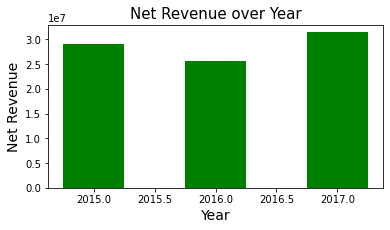

In [13]:
results = df.groupby("year").sum()
years = [year for year, df in df.groupby("year")]
plt.figure(figsize = (6,3))
plt.bar(years, results["net_revenue"], color = "green",
       width = .5)
plt.ylabel("Net Revenue", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.title("Net Revenue over Year", fontsize = 15)
plt.show()

Revenue dipped a little in 2017 before picking back up in 2017.

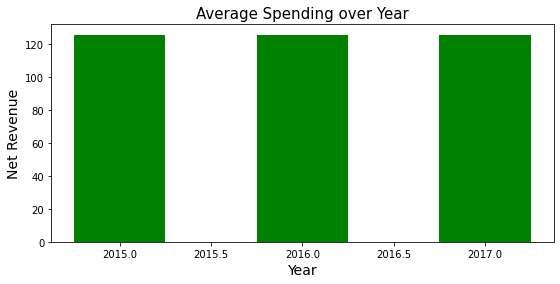

In [14]:
results = df.groupby("year").mean()
years = [year for year, df in df.groupby("year")]
plt.figure(figsize = (9,4))
plt.bar(years, results["net_revenue"], color = "green",
       width = .5)
plt.ylabel("Net Revenue", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.title("Average Spending over Year", fontsize = 15)
plt.show()

Average spending did not change from year to year. 